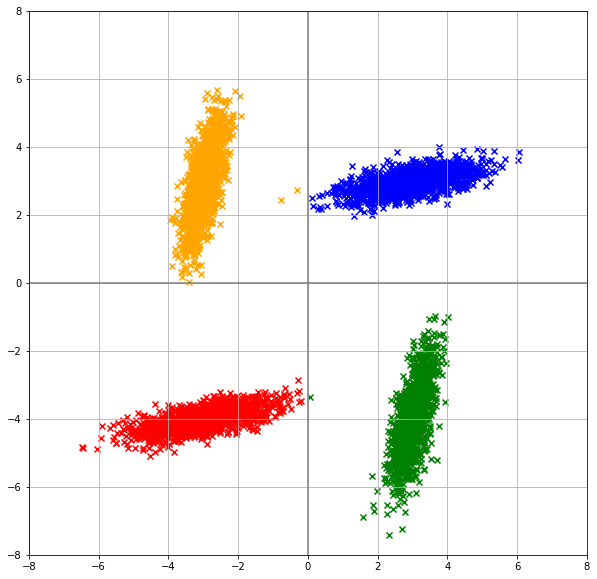

4


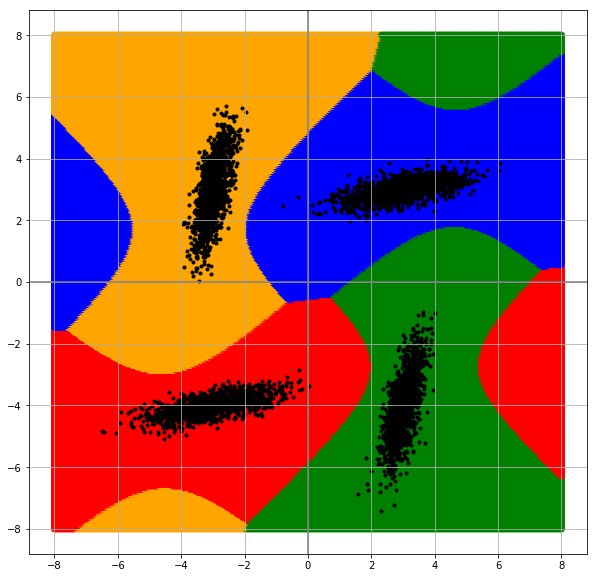

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors

plt.rcParams['figure.figsize'] = [10, 10]

data = np.genfromtxt('data.txt', delimiter=' ')


#výpočet počtu tříd
from maximin import maximin
x = np.zeros(100)
mm = lambda t: maximin(data)
vfunc = np.vectorize(mm)
x = vfunc(x)
cl_nb = int(np.ceil(np.mean(x)))

# rozdělení dat do tříd
from kmeans import kmeans_direct, iterative_optim, kmeans_binary, plot_kmeans_result
#from tools import plot_result

eps = 1.e-03 #nastavení zastavovací podmínky

# přímé dělení
data_classified = kmeans_binary(data, cl_nb, eps)
data_classified = iterative_optim(data_classified, cl_nb)
plot_kmeans_result(data_classified, 8)

##### BAYES ####
data_len = len(data)
# pro všechny třídy určit pravděpodobnost třídy
# pro všechny třídy určit parametry normálního rozdělení
Pw = []
mi = [] 
sigma_det = []
sigma_inv = []

for i in range(cl_nb):
    Pw.append(len(data_classified[i])/data_len)
    mi.append(np.mean(data_classified[i],axis=0))
    sigma = np.cov(data_classified[i].T)
    sigma_det.append(np.linalg.det(sigma))
    sigma_inv.append(np.linalg.inv(sigma))
#print(sigma_det)
#print(sigma_inv)

# pro všechny třídy určit hodnotu p(x|wr)

# vytvořit meshgrid
grid_dim = 300
X,Y = np.meshgrid(np.linspace(-8,8,grid_dim),np.linspace(-8,8,grid_dim))

# pro každý bod určit 4 hodnoty funkce a vybrat tu největší (označit číslem 0-3, nebo rovnou barvou)

z = np.zeros((cl_nb,grid_dim,grid_dim))
for j in range(cl_nb):
    for x in range(0,grid_dim):
        for y in range(0,grid_dim):
            z[j][x,y] = np.exp(-1/2*np.dot(np.dot([X[x,y],Y[x,y]]-mi[j],sigma_inv[j]),[X[x,y],Y[x,y]]-mi[j]))/(np.sqrt((2*np.pi)**2 * sigma_det[j]))

Z = np.argmax(z, axis=0)

cmap = pltcolors.LinearSegmentedColormap.from_list('', ['red','green','blue','orange'])
norm=plt.Normalize(0,3)
plt.scatter(X,Y,c=Z, cmap=cmap, norm=norm)

plt.scatter(data[:,0],data[:,1], color='black', marker='.')

plt.grid(True, which='both')
plt.axhline(y=0, color='gray')
plt.axvline(x=0, color='gray')
plt.show()
